### Bivariate EDA 
#### Categorical - Categorical
#### Categorical - Numerical

In [92]:
import os
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2, chi2_contingency, ttest_ind, f_oneway
from statsmodels.stats import weightstats as stests

from IPython.display import display, HTML
#display(HTML(df_perf.to_html()))
%matplotlib inline

os.chdir('/Users/suma/Documents/01 Data Science/Titanic Problem/')

In [2]:
df_train = pd.read_csv('titanic_train.csv')
df_test = pd.read_csv('titanic_test.csv')

In [4]:
frames = [df_train, df_test]
df = pd.concat(frames, axis = 0, sort = False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


#### Categorical to Categorical variables

##### Chi-Sq Test for Independence test 

##### Generate contingency table 
##### The function takes an array as input representing the contingency table for the two categorical variables. It returns the calculated statistic and p-value for interpretation as well as the calculated degrees of freedom and table of expected frequencies.

In [18]:
target_variable = 'Survived'
categorical_variables = ['Embarked', 'Pclass', 'Cabin']

for cat in categorical_variables:
    cont_table = pd.crosstab(df[target_variable], df[cat], margins = False)
    stat, p, dof, expected = chi2_contingency(cont_table)
    alpha = 1.0 - prob
    if p <= alpha:
        print(cat+': Dependent (reject H0)')
    else:
        print(cat+': Independent (fail to reject H0)')

Embarked: Dependent (reject H0)
Pclass: Dependent (reject H0)
Cabin: Independent (fail to reject H0)


#### Categorical to Numeric variables

##### Line Chart with error Bars

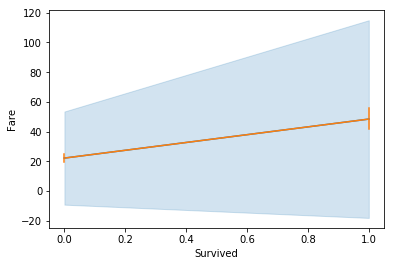

In [58]:
ax = sns.lineplot(x="Survived", y="Fare", markers=True, ci = 'sd', dashes=False, data=df_train)
ax = sns.lineplot(x="Survived", y="Fare", err_style = 'bars', markers=True, dashes=False, ci = 95, data=df_train)

#### t-test (for sample sizes less than 30)

T- Test :- A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features. It is mostly used when the data sets, like the set of data recorded as outcome from flipping a coin a 100 times, would follow a normal distribution and may have unknown variances. T test is used as a hypothesis testing tool, which allows testing of an assumption applicable to a population.

T-test has 2 types : 1. one sampled t-test 2. two-sampled t-test.

One sample t-test : The One Sample t Test determines whether the sample mean is statistically different from a known or hypothesised population mean. The One Sample t Test is a parametric test.

Two sampled T-test :-The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test.

Paired sampled t-test :- The paired sample t-test is also called dependent sample t-test. It’s an uni variate test that tests for a significant difference between 2 related variables. An example of this is if you where to collect the blood pressure for an individual before and after some treatment, condition, or time point.

<img src="ttest-image.png">

In [77]:
#Two sampled T-test 
target_variable = 'Survived'
numerical_variables = ['Fare', 'Age']
for col in numerical_variables:
    if df_train[col].isnull().sum() > 0:
        print(col, " has null values, impute null values before t-test")
    else:
        ttest,pval = ttest_ind(df_train[df_train[target_variable] == 1][col],df_train[df_train[target_variable] == 0][col])
        print(col + " & " + target_variable + ":")
        print("\tp-value","{0:.3f}".format(pval))
        if pval <0.05:
            print("\tDependent (reject H0)")
        else:
            print("\tIndependent (accept H0)")
            
#One Sampled T-test; below example compares the sample mean to a benchmark mean value of 30
# tset, pval = ttest_1samp(ages, 30)

#Paired sampled t-test:
#ttest,pval = stats.ttest_rel(df['bp_before'], df['bp_after'])

Fare & Survived:
	p-value 0.000
	Dependent (reject H0)
Age  has null values, impute null values before t-test


####  Z-test:

- Your sample size is greater than 30. Otherwise, use a t test. <br>
- Data points should be independent from each other. In other words, one data point isn’t related or doesn’t affect another data point. <br>
- Your data should be normally distributed. However, for large sample sizes (over 30) this doesn’t always matter. <br>
- Your data should be randomly selected from a population, where each item has an equal chance of being selected. <br>
- Sample sizes should be equal if at all possible. <br>

<img src="ztest-image.jpg">

In [82]:
#One sample z-test:
#ztest ,pval = stests.ztest(df['bp_before'], x2=None, value=156)

#Two sampled z-test 
target_variable = 'Survived'
numerical_variables = ['Fare', 'Age']
for col in numerical_variables:
    if df_train[col].isnull().sum() > 0:
        print(col, " has null values, impute null values before t-test")
    else:
        ztest ,pval = stests.ztest(df_train[df_train[target_variable] == 1][col], x2=df_train[df_train[target_variable] == 0][col], value=0,alternative='two-sided')
        print(col + " & " + target_variable + ":")
        print("\tp-value","{0:.3f}".format(pval))
        if pval <0.05:
            print("\tDependent (reject H0)")
        else:
            print("\tIndependent (accept H0)")

Fare & Survived:
	p-value 0.000
	Dependent (reject H0)
Age  has null values, impute null values before t-test


#### ANOVA (F-TEST) (when categorical variable has more than 2 classes)

The t-test works well when dealing with two groups, but sometimes we want to compare more than two groups at the same time. For example, if we wanted to test whether voter age differs based on some categorical variable like race, we have to compare the means of each level or group the variable. We could carry out a separate t-test for each pair of groups, but when you conduct many tests you increase the chances of false positives. The analysis of variance or ANOVA is a statistical inference test that lets you compare multiple groups at the same time.

F = Between group variability / Within group variability

<img src="Anova-image.png">
One Way F-test(Anova) :- It tell whether two or more groups are similar or not based on their mean similarity and f-score. <br>

Two Way F-test :- Two way F-test is extension of 1-way f-test, it is used when we have 2 independent variable and 2+ groups. 2-way F-test does not tell which variable is dominant. if we need to check individual significance then Post-hoc testing need to be performed.

In [ ]:
#One-way Anova test
#Relationship between embarked and fare
target_variable = 'Embarked'
numerical_variables = ['Fare', 'Age']
for col in numerical_variables:
    if df_train[col].isnull().sum() > 0:
        print(col, " has null values, impute null values before t-test")
    else:
        F, p = f_oneway(df_train[df_train[target_variable] == 'S'][col], df_train[df_train[target_variable] == 'C'][col], 
                              df_train[df_train[target_variable] == 'Q'][col])
        print(col + " & " + target_variable + ":")
        print("\tp-value","{0:.3f}".format(pval))
        if pval <0.05:
            print("\tDependent (reject H0)")
        else:
            print("\tIndependent (accept H0)")